# Data preprocessing for Fusion and Model

Importing Libraries

In [1]:
# Essentials
import pandas as pd
import numpy as np

# Processing
from sklearn.preprocessing import StandardScaler

# Model

# Visualization

# Warnings
import warnings
warnings.filterwarnings('ignore')

Loading Datasets

In [2]:
# Clinical Datasets
African = pd.read_csv("/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/processed_datasets/clinical/African_pro.csv")
Bangladesh = pd.read_csv("/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/processed_datasets/clinical/Bangladesh_pro.csv")
Iraq = pd.read_csv("/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/processed_datasets/clinical/Iraq_pro.csv")

# Genetic Datasets
inter_genetic = pd.read_csv("/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/processed_datasets/genetic/inter_genetic_dataset.csv")
normal_genetic = pd.read_csv("/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/processed_datasets/genetic/normal_genetic_dataset.csv")

Checking Target Columns

In [3]:
print(African.columns, "\n")
print(Bangladesh.columns, "\n")
print(Iraq.columns, "\n")
print(inter_genetic.columns, "\n")
print(normal_genetic.columns)

Index(['Patient number', 'Cholesterol', 'Glucose', 'HDL Chol',
       'Chol/HDL ratio', 'Age', 'Gender', 'Height', 'Weight', 'BMI',
       'Systolic BP', 'Diastolic BP', 'waist', 'hip', 'Waist/hip ratio',
       'Diabetes', 'BMI Category'],
      dtype='object') 

Index(['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose', 'height',
       'weight', 'bmi', 'family_diabetes', 'hypertensive',
       'family_hypertension', 'cardiovascular_disease', 'stroke',
       'gender_Encoded', 'diabetic_Encoded'],
      dtype='object') 

Index(['Age', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI',
       'Gender_Encoded', 'Class_Encoded'],
      dtype='object') 

Index(['STUDY', 'DISEASE_DESCRIPTION', 'REGION', 'CHR_ID', 'CHR_POS',
       'MAPPED_GENE', 'UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID',
       'UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE', 'SNPS', 'MERGED',
       'GENOMIC_CONTEXT', 'INTERGENIC', 'RISK_ALLELE_FREQUENCY', 'PVALUE',
       'PVALUE_MLOG', 'EF

Uniting Target Columns' name

Checking Data Types 

In [4]:
print(African.dtypes, '\n')
print(Bangladesh.dtypes, '\n')
print(Iraq.dtypes, '\n')
print(inter_genetic.dtypes, '\n')
print(normal_genetic.dtypes, '\n')

Patient number       int64
Cholesterol          int64
Glucose              int64
HDL Chol             int64
Chol/HDL ratio     float64
Age                  int64
Gender               int64
Height               int64
Weight               int64
BMI                float64
Systolic BP          int64
Diastolic BP         int64
waist                int64
hip                  int64
Waist/hip ratio    float64
Diabetes             int64
BMI Category         int64
dtype: object 

age                         int64
pulse_rate                  int64
systolic_bp                 int64
diastolic_bp                int64
glucose                   float64
height                    float64
weight                    float64
bmi                       float64
family_diabetes             int64
hypertensive                int64
family_hypertension         int64
cardiovascular_disease      int64
stroke                      int64
gender_Encoded              int64
diabetic_Encoded            int64
dtype: object 


Checking number of columns and rows

In [5]:
print(African.shape, '\n')
print(Bangladesh.shape, '\n')
print(Iraq.shape, '\n')
print(inter_genetic.shape, '\n')
print(normal_genetic.shape, '\n')

(390, 17) 

(5437, 15) 

(786, 12) 

(1110, 28) 

(2141, 25) 



In [6]:
African.rename(columns={
    'Diabetes': 'T2D',
}, inplace=True)
 
Bangladesh.rename(columns={
    'diabetic_Encoded': 'T2D',
}, inplace=True)
 
Iraq.rename(columns={
    'Class_Encoded': 'T2D',
}, inplace=True)
 
# Add a new column 'T2D' with all values set to 1
#inter_genetic['T2D'] = 1
 
# Add a new column 'T2D' with all values set to 1
#normal_genetic['T2D'] = 1

#  Imports & Target Renaming


In [7]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score, confusion_matrix
)

from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.optimizers import Adam

# Rename clinical targets to 'T2D'
African.rename(columns={'Diabetes':'T2D'},      inplace=True)
Bangladesh.rename(columns={'diabetic_Encoded':'T2D'}, inplace=True)
Iraq.rename(columns={'Class_Encoded':'T2D'},    inplace=True)

# Ensure genetic sets have a 'T2D' column (all positives)
for df in (inter_genetic, normal_genetic):
    if 'T2D' not in df.columns:
        df['T2D'] = 1


# Clinical Train/Val/Test Split


In [8]:
test_size_clin = 0.20
val_size_clin  = 0.25
rs             = 42

def split_clinical(df):
    X_tr_val, X_test, y_tr_val, y_test = train_test_split(
        df.drop(columns='T2D'), df['T2D'],
        test_size=test_size_clin, stratify=df['T2D'], random_state=rs
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_tr_val, y_tr_val,
        test_size=val_size_clin, stratify=y_tr_val, random_state=rs
    )
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train_african, y_train_african, X_val_african, y_val_african, X_test_african, y_test_african = split_clinical(African)
X_train_bangladesh, y_train_bangladesh, X_val_bangladesh, y_val_bangladesh, X_test_bangladesh, y_test_bangladesh = split_clinical(Bangladesh)
X_train_iraq,       y_train_iraq,       X_val_iraq,       y_val_iraq,       X_test_iraq,       y_test_iraq       = split_clinical(Iraq)


# Clinical Preprocessing (Scaling & Imputation)


In [9]:

imputer = SimpleImputer(strategy='mean')

def preprocess_clinical(X_train, X_val, X_test):
    num_cols = X_train.select_dtypes(include=[np.number]).columns
    scaler   = StandardScaler().fit(X_train[num_cols])
    X_tr_sc   = scaler.transform(X_train[num_cols])
    X_val_sc  = scaler.transform(X_val[num_cols])
    X_test_sc = scaler.transform(X_test[num_cols])
    return (
        imputer.fit_transform(X_tr_sc),
        imputer.transform(X_val_sc),
        imputer.transform(X_test_sc)
    )

X_train_african_sc, X_val_african_sc, X_test_african_sc = preprocess_clinical(
    X_train_african, X_val_african, X_test_african
)
X_train_bangladesh_sc, X_val_bangladesh_sc, X_test_bangladesh_sc = preprocess_clinical(
    X_train_bangladesh, X_val_bangladesh, X_test_bangladesh
)
X_train_iraq_sc, X_val_iraq_sc, X_test_iraq_sc = preprocess_clinical(
    X_train_iraq, X_val_iraq, X_test_iraq
)


#  GAN & Balancing Utilities


In [10]:
def build_generator(input_dim, output_dim):
    return Sequential([
        Dense(128, input_dim=input_dim), LeakyReLU(0.2), BatchNormalization(),
        Dense(256),                      LeakyReLU(0.2), BatchNormalization(),
        Dense(output_dim, activation='tanh')
    ])

def build_discriminator(input_dim):
    disc = Sequential([
        Dense(256, input_dim=input_dim), LeakyReLU(0.2),
        Dense(128),                       LeakyReLU(0.2),
        Dense(1, activation='sigmoid')
    ])
    disc.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return disc

def generate_synthetic_negatives(real_df, generator, scaler, num_cols, label_col='T2D'):
    n = len(real_df)
    # 1) Generate fake features
    z    = np.random.normal(0, 1, (n, generator.input_shape[1])).astype(np.float32)
    fake = generator.predict(z, verbose=0)
    # 2) Inverse‐scale numeric
    synth_num = scaler.inverse_transform(fake)
    synth_df  = pd.DataFrame(synth_num, columns=num_cols)
    synth_df[label_col] = 0
    # 3) Real positives (numeric only)
    pos_df = real_df[num_cols + [label_col]].copy()
    # 4) Combine
    balanced = pd.concat([pos_df, synth_df], ignore_index=True)
    X = balanced[num_cols]      # drop any stray non-numeric
    y = balanced[label_col]
    return X, y


#  Genetic Processing (Split, GAN, Balance)


In [11]:
def process_genetic(df, test_size, val_size, rs, noise_dim=100, epochs=1000, batch_size=64):
    # A) Split real positives into train+val vs test
    X_all = df.drop(columns='T2D')
    y_all = df['T2D']
    X_tr_val, X_test, y_tr_val, y_test = train_test_split(
        X_all, y_all, test_size=test_size, stratify=y_all, random_state=rs
    )
    # B) From train+val, carve out validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_tr_val, y_tr_val, test_size=val_size, stratify=y_tr_val, random_state=rs
    )
    # C) Numeric features only
    num_cols = [c for c in X_train.columns if pd.api.types.is_numeric_dtype(X_train[c])]
    # D) Scale training positives
    scaler = MinMaxScaler().fit(X_train[num_cols])
    train_scaled = scaler.transform(X_train[num_cols]).astype(np.float32)
    # E) Build & compile GAN
    generator     = build_generator(noise_dim, train_scaled.shape[1])
    discriminator = build_discriminator(train_scaled.shape[1])
    discriminator.trainable = False
    gan = Sequential([generator, discriminator])
    gan.compile(loss='binary_crossentropy', optimizer=Adam())
    # F) Train GAN (fewer epochs to avoid collapse)
    for ep in range(epochs):
        idx   = np.random.randint(0, len(train_scaled), batch_size)
        real  = train_scaled[idx]
        noise = np.random.normal(0,1,(batch_size,noise_dim))
        fake  = generator.predict(noise, verbose=0)
        discriminator.trainable = True
        discriminator.train_on_batch(real, np.ones((batch_size,1)))
        discriminator.train_on_batch(fake, np.zeros((batch_size,1)))
        discriminator.trainable = False
        gan.train_on_batch(np.random.normal(0,1,(batch_size,noise_dim)), np.ones((batch_size,1)))
        if ep % 200 == 0:
            print(f"[GAN] Epoch {ep}/{epochs}")
    # G) Generate balanced splits
    X_tr_bal, y_tr_bal = generate_synthetic_negatives(
        pd.concat([X_train, y_train], axis=1),
        generator, scaler, num_cols
    )
    X_val_bal, y_val_bal = generate_synthetic_negatives(
        pd.concat([X_val, y_val], axis=1),
        generator, scaler, num_cols
    )
    X_te_bal, y_te_bal   = generate_synthetic_negatives(
        pd.concat([X_test, y_test], axis=1),
        generator, scaler, num_cols
    )
    return X_tr_bal, y_tr_bal, X_val_bal, y_val_bal, X_te_bal, y_te_bal

# New genetic split sizes
test_size_gen = 0.20
val_size_gen  = 0.10 / (1 - test_size_gen)  # ≈0.125

# Process inter_genetic & normal_genetic
X_train_inter, y_train_inter, X_val_inter, y_val_inter, X_test_inter, y_test_inter = \
    process_genetic(inter_genetic, test_size_gen, val_size_gen, rs)

X_train_normal, y_train_normal, X_val_normal, y_val_normal, X_test_normal, y_test_normal = \
    process_genetic(normal_genetic, test_size_gen, val_size_gen, rs)


[GAN] Epoch 0/1000
[GAN] Epoch 200/1000
[GAN] Epoch 400/1000
[GAN] Epoch 600/1000
[GAN] Epoch 800/1000
[GAN] Epoch 0/1000
[GAN] Epoch 200/1000
[GAN] Epoch 400/1000
[GAN] Epoch 600/1000
[GAN] Epoch 800/1000


# Define Models & Assemble Datasets


In [12]:
best_models = {
    "African":       LogisticRegression(random_state=rs, max_iter=1000),
    "Bangladesh":    RandomForestClassifier(random_state=rs),
    "Iraq":          GradientBoostingClassifier(random_state=rs),
    "InterGenetic":  LogisticRegression(random_state=rs, max_iter=1000),
    "NormalGenetic": LogisticRegression(random_state=rs, max_iter=1000),
}

datasets = {
    "African":       (X_train_african_sc, y_train_african, X_val_african_sc, y_val_african, X_test_african_sc, y_test_african),
    "Bangladesh":    (X_train_bangladesh_sc, y_train_bangladesh, X_val_bangladesh_sc, y_val_bangladesh, X_test_bangladesh_sc, y_test_bangladesh),
    "Iraq":          (X_train_iraq_sc, y_train_iraq, X_val_iraq_sc, y_val_iraq, X_test_iraq_sc, y_test_iraq),
    "InterGenetic":  (X_train_inter, y_train_inter, X_val_inter, y_val_inter, X_test_inter, y_test_inter),
    "NormalGenetic": (X_train_normal, y_train_normal, X_val_normal, y_val_normal, X_test_normal, y_test_normal),
}


# Train & Evaluate All Models


In [13]:
for name, (X_tr, y_tr, X_val, y_val, X_te, y_te) in datasets.items():
    clf = best_models[name]
    clf.fit(X_tr, y_tr)

    # Validation
    yv_pred  = clf.predict(X_val)
    yv_proba = clf.predict_proba(X_val)[:,1] if hasattr(clf, "predict_proba") else np.zeros_like(yv_pred, float)
    print(f"\n{name} — Validation — "
          f"Acc={accuracy_score(y_val, yv_pred):.3f}, "
          f"ROC AUC={roc_auc_score(y_val, yv_proba):.3f}, "
          f"PR AUC={average_precision_score(y_val, yv_proba):.3f}")

    # Test
    yt_pred  = clf.predict(X_te)
    yt_proba = clf.predict_proba(X_te)[:,1] if hasattr(clf, "predict_proba") else np.zeros_like(yt_pred, float)
    print(f"{name} — Test       — "
          f"Acc={accuracy_score(y_te, yt_pred):.3f}, "
          f"ROC AUC={roc_auc_score(y_te, yt_proba):.3f}, "
          f"PR AUC={average_precision_score(y_te, yt_proba):.3f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_te, yt_pred))



African — Validation — Acc=0.910, ROC AUC=0.876, PR AUC=0.744
African — Test       — Acc=0.885, ROC AUC=0.949, PR AUC=0.783
Confusion Matrix:
[[64  2]
 [ 7  5]]

Bangladesh — Validation — Acc=0.947, ROC AUC=0.850, PR AUC=0.480
Bangladesh — Test       — Acc=0.944, ROC AUC=0.878, PR AUC=0.410
Confusion Matrix:
[[1014    5]
 [  56   13]]

Iraq — Validation — Acc=0.975, ROC AUC=0.997, PR AUC=0.980
Iraq — Test       — Acc=0.975, ROC AUC=0.998, PR AUC=0.989
Confusion Matrix:
[[138   1]
 [  3  16]]

InterGenetic — Validation — Acc=0.748, ROC AUC=0.795, PR AUC=0.831
InterGenetic — Test       — Acc=0.757, ROC AUC=0.841, PR AUC=0.854
Confusion Matrix:
[[172  50]
 [ 58 164]]

NormalGenetic — Validation — Acc=0.600, ROC AUC=0.609, PR AUC=0.677
NormalGenetic — Test       — Acc=0.622, ROC AUC=0.619, PR AUC=0.715
Confusion Matrix:
[[318 111]
 [213 216]]


## Subplots of Cross Validation for the best model

In [14]:
import numpy as np
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ── 1) Best models mapping (reuse from earlier) ───────────────────────────────
best_models_mapping = {
    "African":       LogisticRegression(random_state=42, max_iter=1000),
    "Bangladesh":    RandomForestClassifier(random_state=42),
    "Iraq":          GradientBoostingClassifier(random_state=42),
    "InterGenetic":  LogisticRegression(random_state=42, max_iter=1000),
    "NormalGenetic": LogisticRegression(random_state=42, max_iter=1000),
}

# ── 2) CV datasets using our preprocessed training splits ──────────────────────
cv_datasets = {
    "African":       (X_train_african_sc,    y_train_african),
    "Bangladesh":    (X_train_bangladesh_sc, y_train_bangladesh),
    "Iraq":          (X_train_iraq_sc,       y_train_iraq),
    "InterGenetic":  (X_train_inter,         y_train_inter),
    "NormalGenetic": (X_train_normal,        y_train_normal),
}

cv_folds  = 10
cv_scores = {}

# ── 3) Perform cross-validation ────────────────────────────────────────────────
for name, (X_tr, y_tr) in cv_datasets.items():
    model = best_models_mapping[name]
    scores = cross_val_score(model, X_tr, y_tr, cv=cv_folds)
    cv_scores[name] = scores

# ── 4) Build subplots ─────────────────────────────────────────────────────────
fig = make_subplots(
    rows=len(cv_datasets), cols=1, shared_xaxes=True,
    subplot_titles=[
        f"{name} ({best_models_mapping[name].__class__.__name__}) CV Scores"
        for name in cv_datasets
    ]
)

# ── 5) Plot each dataset’s fold scores ────────────────────────────────────────
for i, (name, scores) in enumerate(cv_scores.items(), start=1):
    fig.add_trace(
        go.Scatter(
            x=list(range(1, cv_folds + 1)),
            y=scores,
            mode='lines+markers',
            name=name
        ),
        row=i, col=1
    )

# ── 6) Layout tweaks ──────────────────────────────────────────────────────────
fig.update_layout(
    height=300 * len(cv_datasets),
    width=800,
    title_text="10-Fold Cross-Validation Accuracy for Best Models",
    showlegend=False
)
fig.update_xaxes(title_text="Fold #")
fig.update_yaxes(title_text="Accuracy")

fig.show()



ROC Curves for Best Models

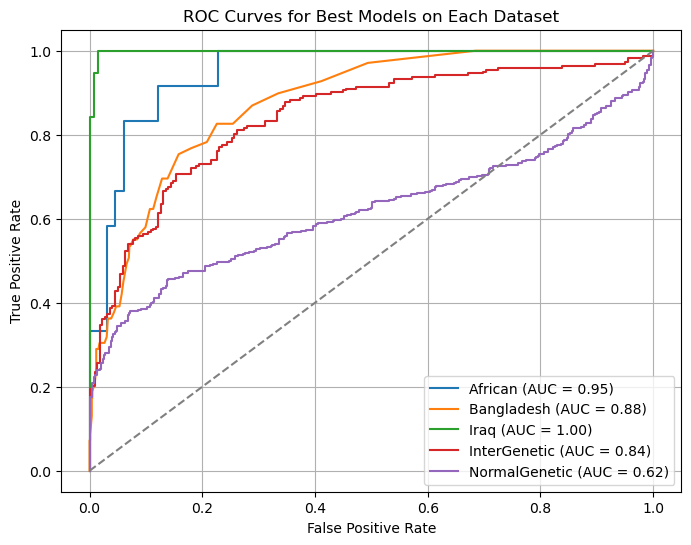

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ── 1) Prepare ROC datasets using our preprocessed splits ─────────────────────
roc_datasets = {
    "African":       (X_train_african_sc,    X_test_african_sc,    y_train_african,    y_test_african),
    "Bangladesh":    (X_train_bangladesh_sc, X_test_bangladesh_sc, y_train_bangladesh, y_test_bangladesh),
    "Iraq":          (X_train_iraq_sc,       X_test_iraq_sc,       y_train_iraq,       y_test_iraq),
    "InterGenetic":  (X_train_inter,         X_test_inter,         y_train_inter,      y_test_inter),
    "NormalGenetic": (X_train_normal,        X_test_normal,        y_train_normal,     y_test_normal),
}

# ── 2) Compute ROC curve & AUC for each dataset’s best model ───────────────────
roc_data = {}
for name, (X_tr, X_te, y_tr, y_te) in roc_datasets.items():
    model = best_models_mapping[name]
    model.fit(X_tr, y_tr)                         # train on train split
    y_prob = model.predict_proba(X_te)[:, 1]      # probability for positive class
    fpr, tpr, _ = roc_curve(y_te, y_prob)         # ROC points
    roc_auc = auc(fpr, tpr)                      # AUC value
    roc_data[name] = (fpr, tpr, roc_auc)

# ── 3) Plot all ROC curves together ────────────────────────────────────────────
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc_val) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_val:.2f})")

# Diagonal “chance” line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Best Models on Each Dataset")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Feature Importance

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# ——— Assemble scaled features + original DataFrames for column names ——————
datasets_scaled = {
    "African":       (X_train_african_sc,    y_train_african,    X_train_african),
    "Bangladesh":    (X_train_bangladesh_sc, y_train_bangladesh, X_train_bangladesh),
    "Iraq":          (X_train_iraq_sc,       y_train_iraq,       X_train_iraq),
    "InterGenetic":  (X_train_inter,         y_train_inter,      X_train_inter),
    "NormalGenetic": (X_train_normal,        y_train_normal,     X_train_normal),
}

feature_importance_results = {}

for name, (X_scaled, y, X_df) in datasets_scaled.items():
    # Train the RandomForest on the scaled features
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_scaled, y)
    
    # Get numeric feature names
    numeric_cols = list(X_df.select_dtypes(include=[np.number]).columns)
    
    # Map importances back to column names
    imps = pd.Series(rf.feature_importances_, index=numeric_cols)
    
    # Sort descending
    feature_importance_results[name] = imps.sort_values(ascending=False)

# Print the top 5 features for each dataset
for name, fi in feature_importance_results.items():
    print(f"\n=== Top 5 features for {name} ===")
    print(fi.head(5))



=== Top 5 features for African ===
Glucose           0.385445
Systolic BP       0.073045
Chol/HDL ratio    0.068207
Patient number    0.066245
HDL Chol          0.054668
dtype: float64

=== Top 5 features for Bangladesh ===
glucose         0.216040
bmi             0.109953
pulse_rate      0.099473
diastolic_bp    0.097177
systolic_bp     0.096943
dtype: float64

=== Top 5 features for Iraq ===
HbA1c    0.330292
BMI      0.260112
Age      0.128298
Chol     0.127068
TG       0.045040
dtype: float64

=== Top 5 features for InterGenetic ===
IMPUTED_ENCODED                 0.273656
PLATFORM_AFFYMETRIX_ILLUMINA    0.157485
PLATFORM_AFFYMETRIX             0.127362
INTERGENIC                      0.113785
MERGED                          0.065639
dtype: float64

=== Top 5 features for NormalGenetic ===
IMPUTED_ENCODED                 0.246983
INTERGENIC                      0.177342
MERGED                          0.138414
PLATFORM_AFFYMETRIX_ILLUMINA    0.137936
CI_RANGE                      

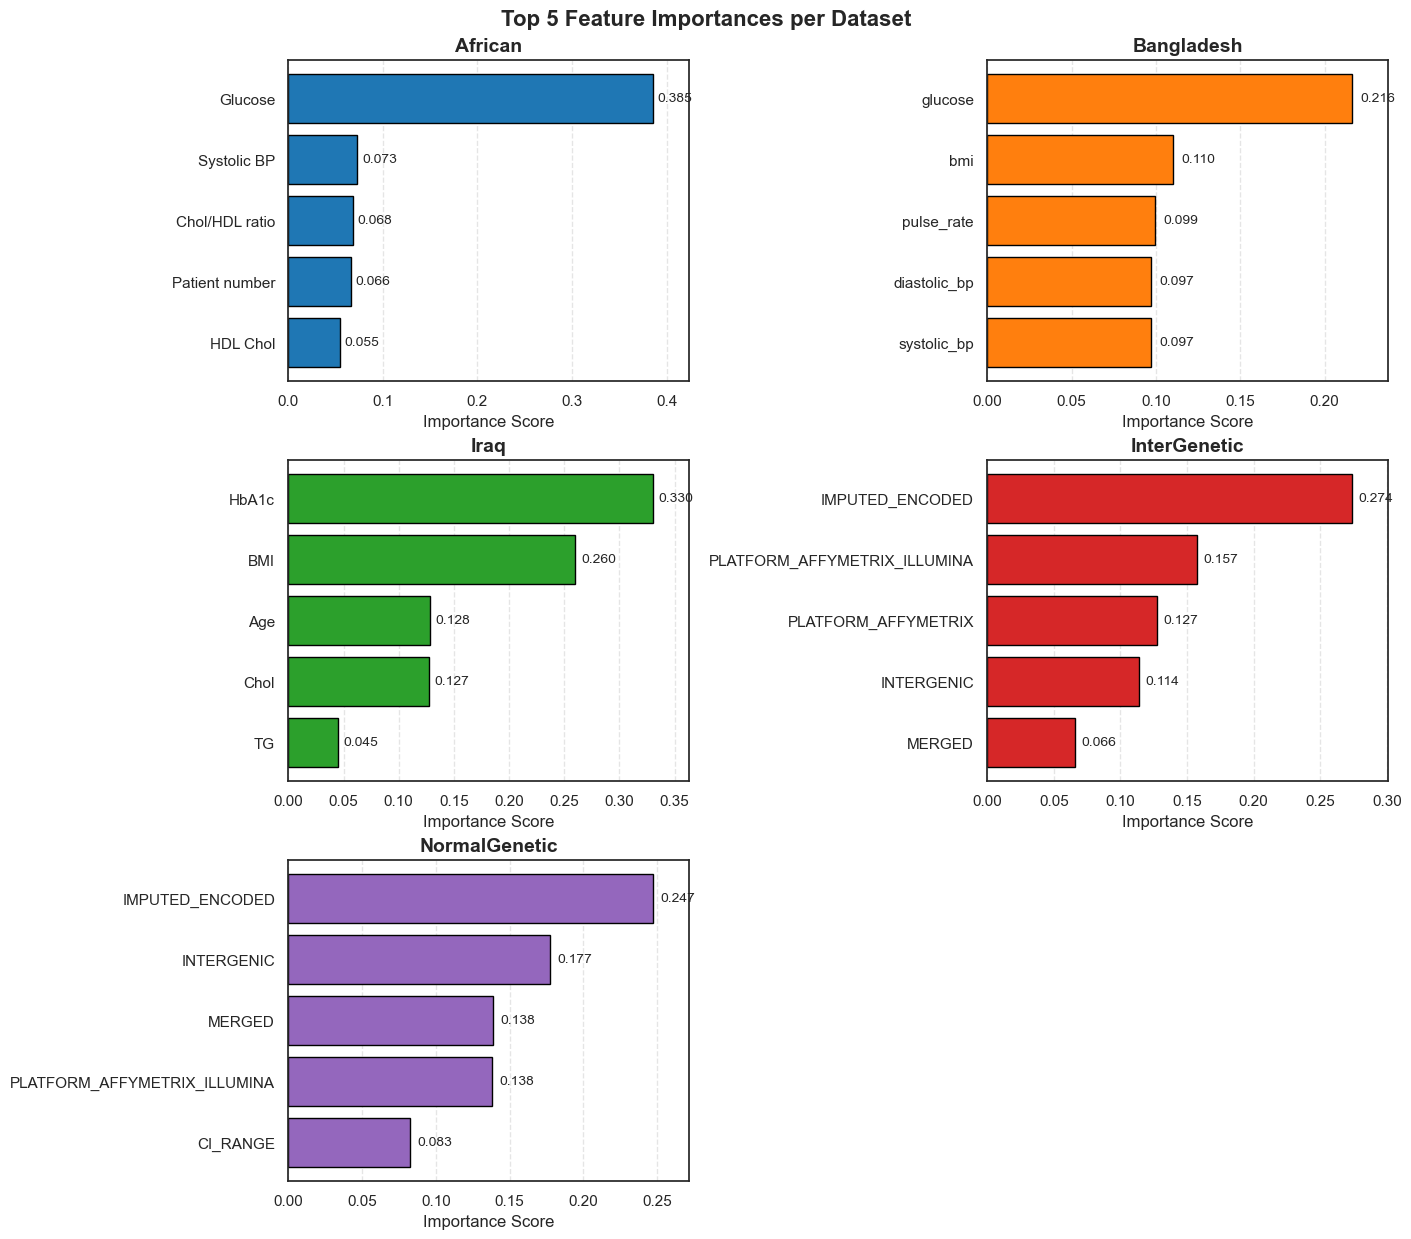

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import ceil

# Use a clean style
sns.set(style="white")

# Number of top features to show
top_n = 5

# Prepare subplots: 2 columns
n_datasets = len(feature_importance_results)
n_cols = 2
n_rows = ceil(n_datasets / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), constrained_layout=True)
axes = axes.flatten()

# A distinct color for each dataset
palette = sns.color_palette("tab10", n_colors=n_datasets)

for idx, ((dataset_name, fi_series), ax) in enumerate(zip(feature_importance_results.items(), axes)):
    # Take top_n and reverse for horizontal bar chart
    top_features = fi_series.head(top_n)[::-1]
    
    # Plot
    ax.barh(top_features.index, top_features.values, color=palette[idx], edgecolor="black")
    
    # Annotate values
    for i, v in enumerate(top_features.values):
        ax.text(v + 0.005, i, f"{v:.3f}", va='center', fontsize=10)
    
    # Titles and labels
    ax.set_title(dataset_name, fontsize=14, weight="bold")
    ax.set_xlabel("Importance Score", fontsize=12)
    ax.set_ylabel("")  # feature names on y-axis are clear
    
    # Consistent x-axis across subplots
    ax.set_xlim(0, max(fi_series.head(top_n).values) * 1.1)
    
    # Light grid
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.yaxis.grid(False)

# Turn off any extra axes
for ax in axes[n_datasets:]:
    ax.axis('off')

plt.suptitle("Top 5 Feature Importances per Dataset", fontsize=16, weight="bold", y=1.02)
plt.show()


# Data Fusion

Epoch 1/100
 8/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4966 - loss: 1.4771 Epoch 001 | loss=1.4967, acc=0.4715 | val_loss=1.3952, val_acc=0.4875 | 9.02s
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4901 - loss: 1.4814 - val_accuracy: 0.4875 - val_loss: 1.3952 - learning_rate: 1.0000e-04
Epoch 2/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4727 - loss: 1.4297 Epoch 002 | loss=1.4562, acc=0.4842 | val_loss=1.3890, val_acc=0.5375 | 0.23s
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4748 - loss: 1.4345 - val_accuracy: 0.5375 - val_loss: 1.3890 - learning_rate: 1.0000e-04
Epoch 3/100
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5223 - loss: 1.4347 Epoch 003 | loss=1.4272, acc=0.5158 | val_loss=1.3837, val_acc=0.5250 | 0.21s
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5211 - loss: 1.4333 - val_accuracy: 0.5250 - val_loss: 1.3837 - learning_rate: 1.0000e-04
Epoch 4/100
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4627 - loss: 1

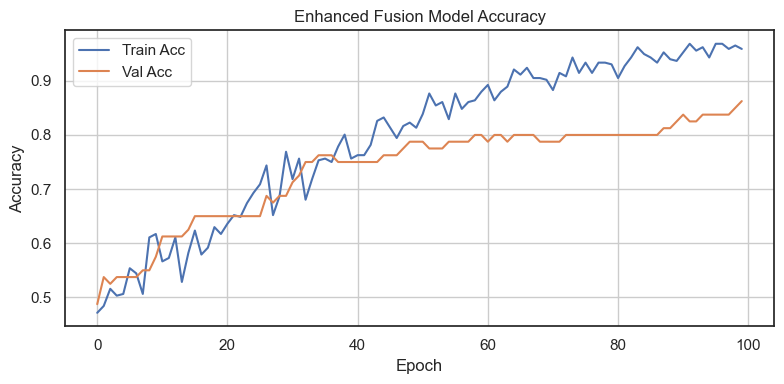

In [18]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Dense, BatchNormalization, Dropout,
    Concatenate, Add, Multiply
)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback


rs = 42

# ── 1) Individually balance each modality ────────────────────────────────────
sm = SMOTE(random_state=rs)
X_bal = {}
y_bal = {}

# clinical via SMOTE
X_bal["African"],    y_bal["African"]    = sm.fit_resample(X_train_african_sc,    y_train_african)
X_bal["Bangladesh"], y_bal["Bangladesh"] = sm.fit_resample(X_train_bangladesh_sc, y_train_bangladesh)
X_bal["Iraq"],       y_bal["Iraq"]       = sm.fit_resample(X_train_iraq_sc,       y_train_iraq)

# genetic already “balanced” by your GAN outputs
X_bal["inter_genetic"],  y_bal["inter_genetic"]  = X_train_inter,  y_train_inter
X_bal["normal_genetic"], y_bal["normal_genetic"] = X_train_normal, y_train_normal

# ── 2) Down‐sample every modality to the same size ───────────────────────────
modalities = list(X_bal.keys())
N_min = min(len(y_bal[m]) for m in modalities)

for m in modalities:
    Xb, yb = X_bal[m], y_bal[m]
    if len(yb) > N_min:
        # stratified down‐sampling to exactly N_min
        Xb_ds, _, yb_ds, _ = train_test_split(
            Xb, yb,
            train_size=N_min,
            stratify=yb,
            random_state=rs
        )
    else:
        Xb_ds, yb_ds = Xb, yb
    X_bal[m], y_bal[m] = Xb_ds, yb_ds

# ── 3) Build shared train/test indices ──────────────────────────────────────
indices = np.arange(N_min)
# pick any modality (all now length N_min) for stratify
idx_tr, idx_te = train_test_split(
    indices,
    test_size=0.2,
    stratify=y_bal[modalities[0]],
    random_state=rs
)

# ── 4) Scale each modality using row‐based indexing ────────────────────────
scaled_splits = {}
for m in modalities:
    Xb = X_bal[m]
    Xb_tr = Xb.iloc[idx_tr] if isinstance(Xb, pd.DataFrame) else Xb[idx_tr]
    Xb_te = Xb.iloc[idx_te] if isinstance(Xb, pd.DataFrame) else Xb[idx_te]
    scaler = StandardScaler().fit(Xb_tr)
    scaled_splits[m] = (
        scaler.transform(Xb_tr),
        scaler.transform(Xb_te)
    )

X_tr_inputs = [scaled_splits[m][0] for m in modalities]
X_te_inputs = [scaled_splits[m][1] for m in modalities]
y_tr = (y_bal[modalities[0]].iloc[idx_tr]
        if isinstance(y_bal[modalities[0]], pd.Series)
        else y_bal[modalities[0]][idx_tr])
y_te = (y_bal[modalities[0]].iloc[idx_te]
        if isinstance(y_bal[modalities[0]], pd.Series)
        else y_bal[modalities[0]][idx_te])

# ── 5) Define fusion model ──────────────────────────────────────────────────
def build_branch(input_dim, l2_reg=1e-3):
    inp = Input(shape=(input_dim,))
    x   = Dense(64, activation="relu", kernel_regularizer=l2(l2_reg))(inp)
    x   = BatchNormalization()(x)
    x   = Dense(32, activation="relu", kernel_regularizer=l2(l2_reg))(x)
    proj= Dense(32, kernel_regularizer=l2(l2_reg))(inp)
    x   = Add()([x, proj])
    x   = BatchNormalization()(x)
    return inp, x

branches = [build_branch(scaled_splits[m][0].shape[1]) for m in modalities]
inputs, feats = zip(*branches)

merged = Concatenate()(feats)
se = Dense(merged.shape[-1] // 16, activation="relu")(merged)
se = Dense(merged.shape[-1], activation="sigmoid")(se)
x  = Multiply()([merged, se])
x  = Dense(128, activation="relu", kernel_regularizer=l2(1e-3))(x)
x  = Dropout(0.5)(x)
x  = Dense(64, activation="relu", kernel_regularizer=l2(1e-3))(x)
x  = Dropout(0.5)(x)
out= Dense(1, activation="sigmoid")(x)

model = Model(inputs=list(inputs), outputs=out)
model.compile(
    optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# ── 6) Train with time logger ───────────────────────────────────────────────
class TimeLogger(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self._start = time.time()
    def on_epoch_end(self, epoch, logs=None):
        dt = time.time() - self._start
        print(
            f"Epoch {epoch+1:03d} | loss={logs['loss']:.4f}, acc={logs['accuracy']:.4f} | "
            f"val_loss={logs['val_loss']:.4f}, val_acc={logs['val_accuracy']:.4f} | "
            f"{dt:.2f}s"
        )

callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6),
    TimeLogger()
]

history = model.fit(
    X_tr_inputs, y_tr,
    validation_data=(X_te_inputs, y_te),
    epochs=100,
    batch_size=32,
    callbacks=callbacks
)

# ── 7) Plot training & validation accuracy ─────────────────────────────────
plt.figure(figsize=(8,4))
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Enhanced Fusion Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Saving model and scalers

In [19]:
# Save in Keras v3 native format
model.save('/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/fusion_model.keras')


In [20]:
import tensorflow as tf
model = tf.keras.models.load_model(
    '/Users/mohammedbasem/Desktop/T2D-Prediction-System--Data-Fusion-for-Enhanced-Decision-Making/fusion_model.keras'
)


In [21]:
# right after training…
model.save('fusion_model.h5')

from tensorflow.keras.models import load_model
model = load_model('fusion_model.h5')


In [22]:
import pickle
from tensorflow.keras.models import model_from_json

# ── Saving ──────────────────────────────────────────────────────────────────
# 1) Serialize architecture to JSON
arch = model.to_json()
# 2) Get raw weights
wts  = model.get_weights()
# 3) Dump both into a pickle
with open('fusion_model.pkl', 'wb') as f:
    pickle.dump({'arch': arch, 'weights': wts}, f)

# ── Loading ─────────────────────────────────────────────────────────────────
with open('fusion_model.pkl', 'rb') as f:
    data = pickle.load(f)

# 1) Reconstruct from JSON
model = model_from_json(data['arch'])
# 2) Set the weights back
model.set_weights(data['weights'])
# 3) (Re)compile if you want to further train or evaluate
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
'''from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Evaluate overall loss & accuracy on the combined test inputs
loss, acc = model.evaluate(
    X_te_inputs,   # list of 5 scaled test arrays
    y_te,
    verbose=0
)
print(f"Test Loss: {loss:.4f}    Test Accuracy: {acc:.4f}\n")

# 2) Get per‐sample predictions (probabilities and binary labels)
y_pred_prob = model.predict(X_te_inputs).flatten()
y_pred      = (y_pred_prob >= 0.5).astype(int)

# 3) Print classification report for both classes
print("Classification Report:\n")
print(classification_report(
    y_te,
    y_pred,
    target_names=['No T2D (0)', 'Yes T2D (1)'],
    zero_division=0
))

# 4) Plot confusion matrix
cm = confusion_matrix(y_te, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Pred: 0','Pred: 1'],
    yticklabels=['True: 0','True: 1']
)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# 5) Plot ROC Curve and PR Curve side by side
fpr, tpr, _ = roc_curve(y_te, y_pred_prob)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_te, y_pred_prob)
pr_auc = average_precision_score(y_te, y_pred_prob)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ROC
ax1.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
ax1.plot([0,1], [0,1], '--', color='gray')
ax1.set_title("ROC Curve")
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.legend(loc="lower right")
ax1.grid(True)

# Precision-Recall
ax2.plot(recall, precision, label=f"AP = {pr_auc:.3f}")
ax2.set_title("Precision-Recall Curve")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")
ax2.legend(loc="lower left")
ax2.grid(True)

plt.tight_layout()
plt.show()'''


'from sklearn.metrics import (\n    classification_report,\n    confusion_matrix,\n    roc_curve,\n    auc,\n    precision_recall_curve,\n    average_precision_score\n)\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# 1) Evaluate overall loss & accuracy on the combined test inputs\nloss, acc = model.evaluate(\n    X_te_inputs,   # list of 5 scaled test arrays\n    y_te,\n    verbose=0\n)\nprint(f"Test Loss: {loss:.4f}    Test Accuracy: {acc:.4f}\n")\n\n# 2) Get per‐sample predictions (probabilities and binary labels)\ny_pred_prob = model.predict(X_te_inputs).flatten()\ny_pred      = (y_pred_prob >= 0.5).astype(int)\n\n# 3) Print classification report for both classes\nprint("Classification Report:\n")\nprint(classification_report(\n    y_te,\n    y_pred,\n    target_names=[\'No T2D (0)\', \'Yes T2D (1)\'],\n    zero_division=0\n))\n\n# 4) Plot confusion matrix\ncm = confusion_matrix(y_te, y_pred)\nplt.figure(figsize=(5,4))\nsns.heatmap(\n    cm,\n    annot=True,\n    fmt=\'